In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
file_path = "/content/dbscan_outlier_dataset.csv"
df = pd.read_csv(file_path)

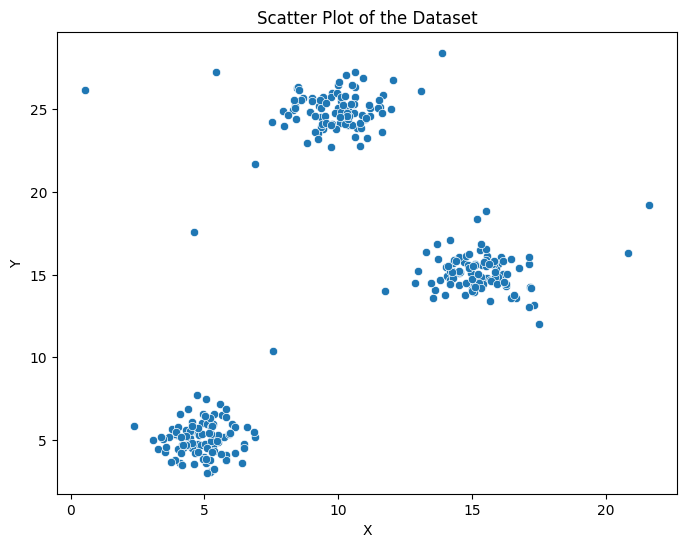

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["X"], y=df["Y"])
plt.title("Scatter Plot of the Dataset")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df["cluster"] = dbscan.fit_predict(df[["X", "Y"]])

In [ ]:
outliers_dbscan = df[df["cluster"] == -1]

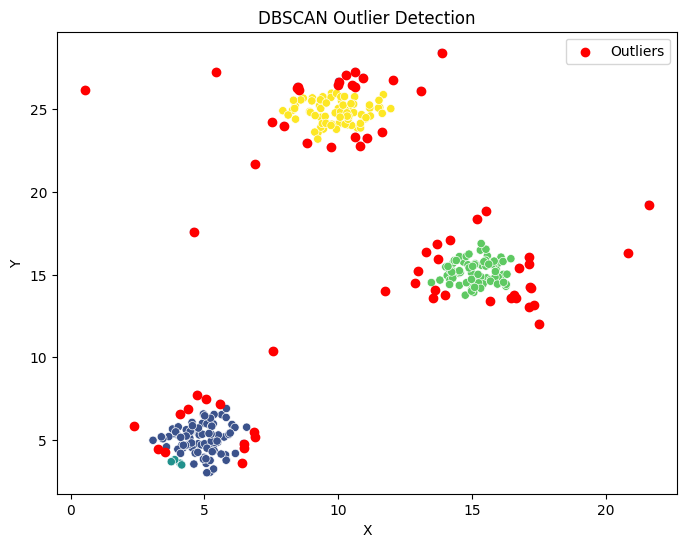

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["X"], y=df["Y"], hue=df["cluster"], palette="viridis", legend=False)
plt.scatter(outliers_dbscan["X"], outliers_dbscan["Y"], color="red", label="Outliers")
plt.title("DBSCAN Outlier Detection")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [ ]:
df["label"] = np.where(df["cluster"] == -1, 1, 0)

In [ ]:
df_cleaned = df[df["cluster"] != -1].drop(columns=["cluster"])
df_cleaned["label"] = 0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[["X", "Y"]], df["label"], test_size=0.2, random_state=42)


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)


In [ ]:
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(
    df_cleaned[["X", "Y"]], df_cleaned["label"], test_size=0.2, random_state=42
)

In [ ]:
model_cleaned = RandomForestClassifier(n_estimators=100, random_state=42)
model_cleaned.fit(X_train_cleaned, y_train_cleaned)
y_pred_cleaned = model_cleaned.predict(X_test_cleaned)

In [ ]:
accuracy_cleaned = accuracy_score(y_test_cleaned, y_pred_cleaned)
precision_cleaned = precision_score(y_test_cleaned, y_pred_cleaned, zero_division=1)
recall_cleaned = recall_score(y_test_cleaned, y_pred_cleaned, zero_division=1)
f1_cleaned = f1_score(y_test_cleaned, y_pred_cleaned, zero_division=1)

In [ ]:
performance_comparison = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Before Outlier Removal": [accuracy, precision, recall, f1],
    "After Outlier Removal": [accuracy_cleaned, precision_cleaned, recall_cleaned, f1_cleaned],
}


In [ ]:
performance_df = pd.DataFrame(performance_comparison)
print(performance_df)

      Metric  Before Outlier Removal  After Outlier Removal
0   Accuracy                0.967742                    1.0
1  Precision                0.923077                    1.0
2     Recall                0.923077                    1.0
3   F1 Score                0.923077                    1.0
